In [115]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Data Importing

In [116]:
data = fetch_california_housing(as_frame=True)
dataFrame = data.frame

In [117]:
dataFrame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# EDA

In [118]:
dataFrame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [119]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [120]:
dataFrame.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [121]:
X = dataFrame.drop('MedHouseVal', axis=1)
y = dataFrame['MedHouseVal']

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xScaled = scaler.fit_transform(X)

In [123]:
xScaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

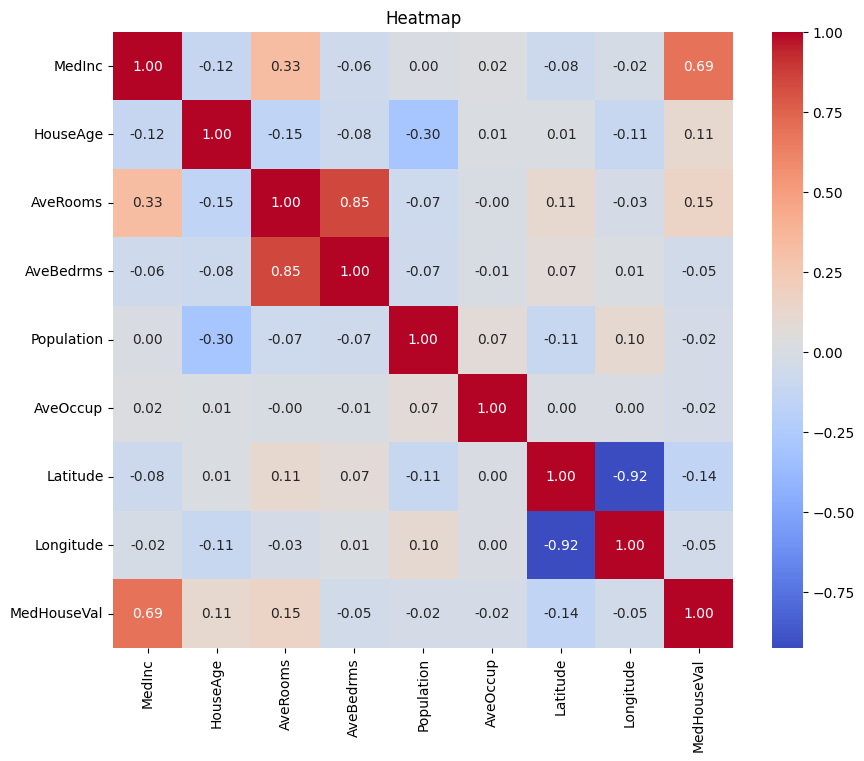

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(dataFrame.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap')
plt.show()


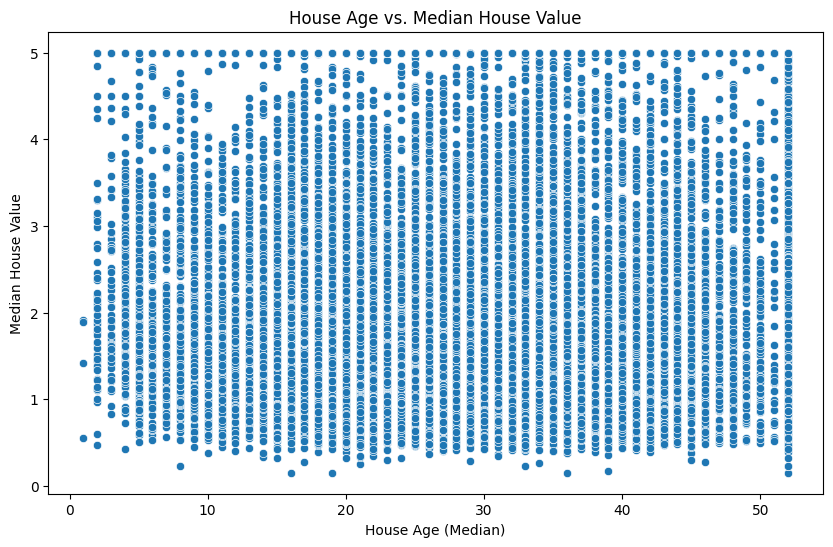

In [125]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataFrame, x='HouseAge', y='MedHouseVal')
plt.title('House Age vs. Median House Value')
plt.xlabel('House Age (Median)')
plt.ylabel('Median House Value')
plt.show()


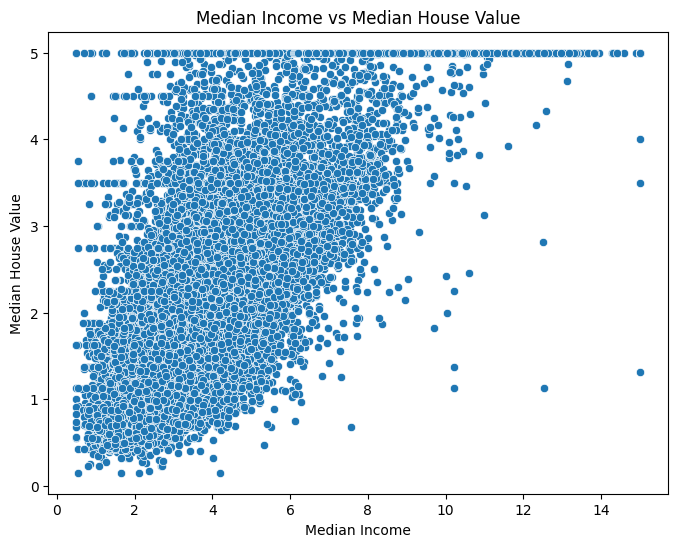

In [126]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=dataFrame)
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

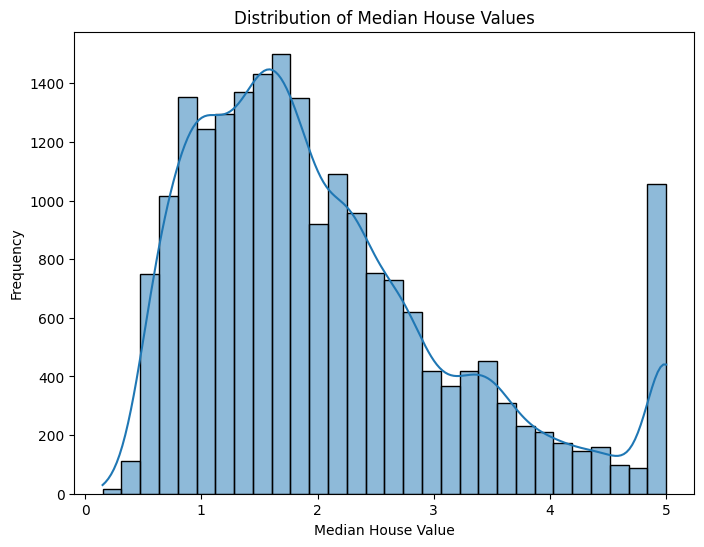

In [127]:

# Histogram of median house values
plt.figure(figsize=(8, 6))
sns.histplot(dataFrame['MedHouseVal'], bins=30, kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

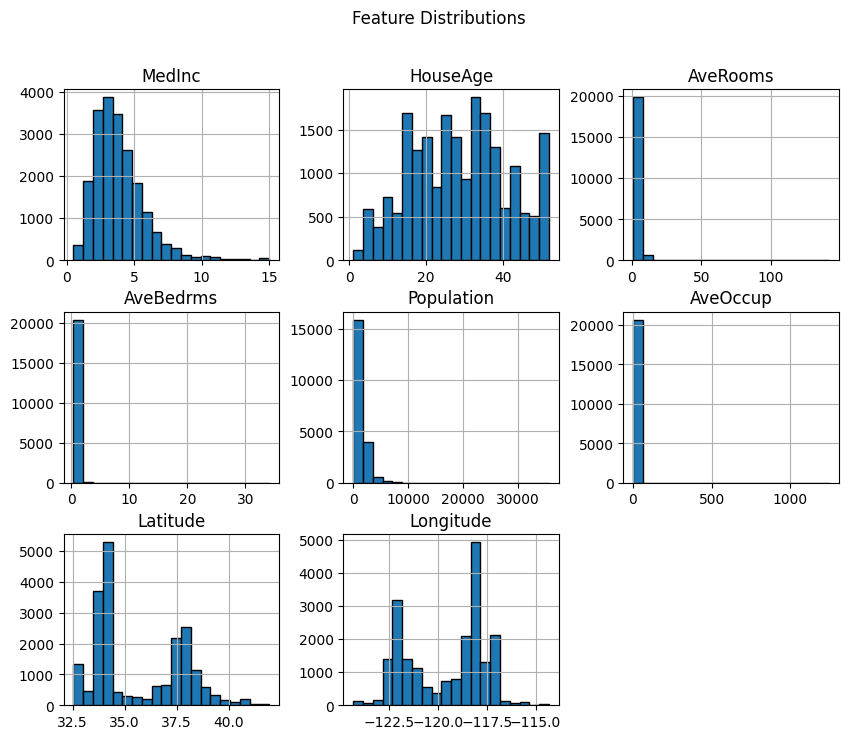

In [128]:
X.hist(bins=20, figsize=(10, 8), edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

# Train Test Split

In [129]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xScaled, y, test_size=0.2, random_state=42)

# Model Importing

In [130]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Multiple Linear Regression
LR = LinearRegression()
LR.fit(xTrain, yTrain)

LinearRegression()

In [131]:
# Ridge Regression
RR = Ridge()
RR.fit(xTrain, yTrain)

Ridge()

In [132]:
# Lasso Regression
LRegr = Lasso()
LRegr.fit(xTrain, yTrain)

Lasso()

# Hyperparameter Tuning

In [133]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

# Ridge
RReg = GridSearchCV(Ridge(), param_grid, cv=5)
RReg.fit(xTrain, yTrain)

# Lasso
LReg = GridSearchCV(Lasso(), param_grid, cv=5)
LReg.fit(xTrain, yTrain)

print(f'Best Ridge Alpha: {RReg.best_params_}')
print(f'Best Lasso Alpha: {LReg.best_params_}')


Best Ridge Alpha: {'alpha': 0.1}
Best Lasso Alpha: {'alpha': 0.1}


# Evaluation

In [134]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

models = {
    "Linear Regression": LR,
    "Ridge Regression": RR,
    "Lasso Regression": LRegr,
    "Ridge Regression (Tuned)": RReg.best_estimator_,
    "Lasso Regression (Tuned)": LReg.best_estimator_
}

# Evaluation function
def evaluate_model(model, X, y):
    predictions = model.predict(X)
    rmse = mean_squared_error(y, predictions, squared=False)
    r2 = r2_score(y, predictions)
    mae = mean_absolute_error(y, predictions)
    return rmse, r2, mae

In [135]:
results = []
for name, model in models.items():
    rmse, r2, mae = evaluate_model(model, xTest, yTest)
    results.append({'Model': name, 'RMSE': rmse, 'R²': r2, 'MAE': mae})
    print(f"{name} - RMSE: {rmse}, R²: {r2}, MAE: {mae}")

Linear Regression - RMSE: 0.7455813830127761, R²: 0.5757877060324511, MAE: 0.5332001304956565
Ridge Regression - RMSE: 0.745554290938461, R²: 0.575818534544132, MAE: 0.5331933646313113
Lasso Regression - RMSE: 1.1448563543099792, R²: -0.00021908714592466794, MAE: 0.9060685490007149
Ridge Regression (Tuned) - RMSE: 0.745578665891467, R²: 0.5757907979394903, MAE: 0.5331994387872134
Lasso Regression (Tuned) - RMSE: 0.824349148731848, R²: 0.4814202815313765, MAE: 0.6221475526943097


In [136]:
resultsData = pd.DataFrame(results)
print(resultsData)

                      Model      RMSE        R²       MAE
0         Linear Regression  0.745581  0.575788  0.533200
1          Ridge Regression  0.745554  0.575819  0.533193
2          Lasso Regression  1.144856 -0.000219  0.906069
3  Ridge Regression (Tuned)  0.745579  0.575791  0.533199
4  Lasso Regression (Tuned)  0.824349  0.481420  0.622148


# Results Inference

### Model Performance Comparison
Linear Regression and Ridge Regression perform similarly, with RMSE values around 0.7455 and R² values close to 0.576, indicating they effectively capture data trends. In contrast, Lasso Regression significantly underperformed, showing an RMSE of 1.1449 and a near-zero R² (-0.000219), suggesting poor fit due to over-regularization.

### Tuning Impact
The tuned versions of Ridge and Lasso exhibit minimal changes. Tuned Ridge maintains its performance, while tuned Lasso shows slightly worse metrics, highlighting the risks of over-regularization.

### Error Analysis
MAE values align with RMSE findings, where Linear and Ridge regressions have MAEs around 0.533, indicating similar prediction errors. Lasso's MAE of 0.906, and 0.622 for the tuned version, suggest it may not be suitable for this dataset.

### R-squared Interpretation
Linear and Ridge regressions explain about 57.6% of the variance, while Lasso's near-zero R² indicates it fails to capture meaningful variance, confirming its inadequacy in this context.